<a href="https://colab.research.google.com/github/OmarK920/Big_data/blob/main/SparkDataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spark Dataframe**

# Imports

In [ ]:
!pip install pyspark
!pip install findspark
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=5c86f02348b2e2ecdb18c2c6adc91dbee6a3faa9238919819128bb4b549df9f5
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import findspark
findspark.init()

In [ ]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

In [ ]:
# Creating a spark session
sc = SparkContext()

spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
spark

# Basic Data Statistics and Understanding

Here iam trying to understand the data using basic methods

In [ ]:
test_df = pd.read_csv('/content/music_streaming.csv')

In [ ]:
df = pd.read_csv('/content/music_streaming.csv')
df.head(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
test_df.shape

(15517, 17)

In [ ]:
test_df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Genre'],
      dtype='object')

In [ ]:
test_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
count,15123.000000,15517.000000,15517.000000,13774.000000,15517.000000,15517.000000,15517.000000,15517.000000,11930.000000,15517.000000,15517.000000,15517.000000,1.551700e+04,15517.000000,15517.000000
mean,45.582358,0.541469,0.668711,5.964281,-7.856428,0.652639,0.080936,0.238502,0.177348,0.196837,0.487344,122.833548,1.992960e+05,3.925114,6.564155
std,17.400843,0.166838,0.235402,3.196333,4.018688,0.476147,0.084977,0.309605,0.302935,0.160212,0.240228,29.686429,1.148326e+05,0.360904,3.258829
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,34.000000,0.430000,0.517000,3.000000,-9.483000,0.000000,0.035100,0.003380,0.000097,0.097400,0.298000,99.729000,1.632400e+05,4.000000,5.000000
50%,45.000000,0.543000,0.708000,6.000000,-6.971000,1.000000,0.048300,0.068100,0.004215,0.129000,0.484000,120.065000,2.084270e+05,4.000000,8.000000
75%,57.000000,0.656000,0.866000,9.000000,-5.150000,1.000000,0.084800,0.410000,0.203000,0.260000,0.674000,142.378000,2.522530e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


<ipython-input-108-a4e31a21f8e0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmap = test_df.corr()


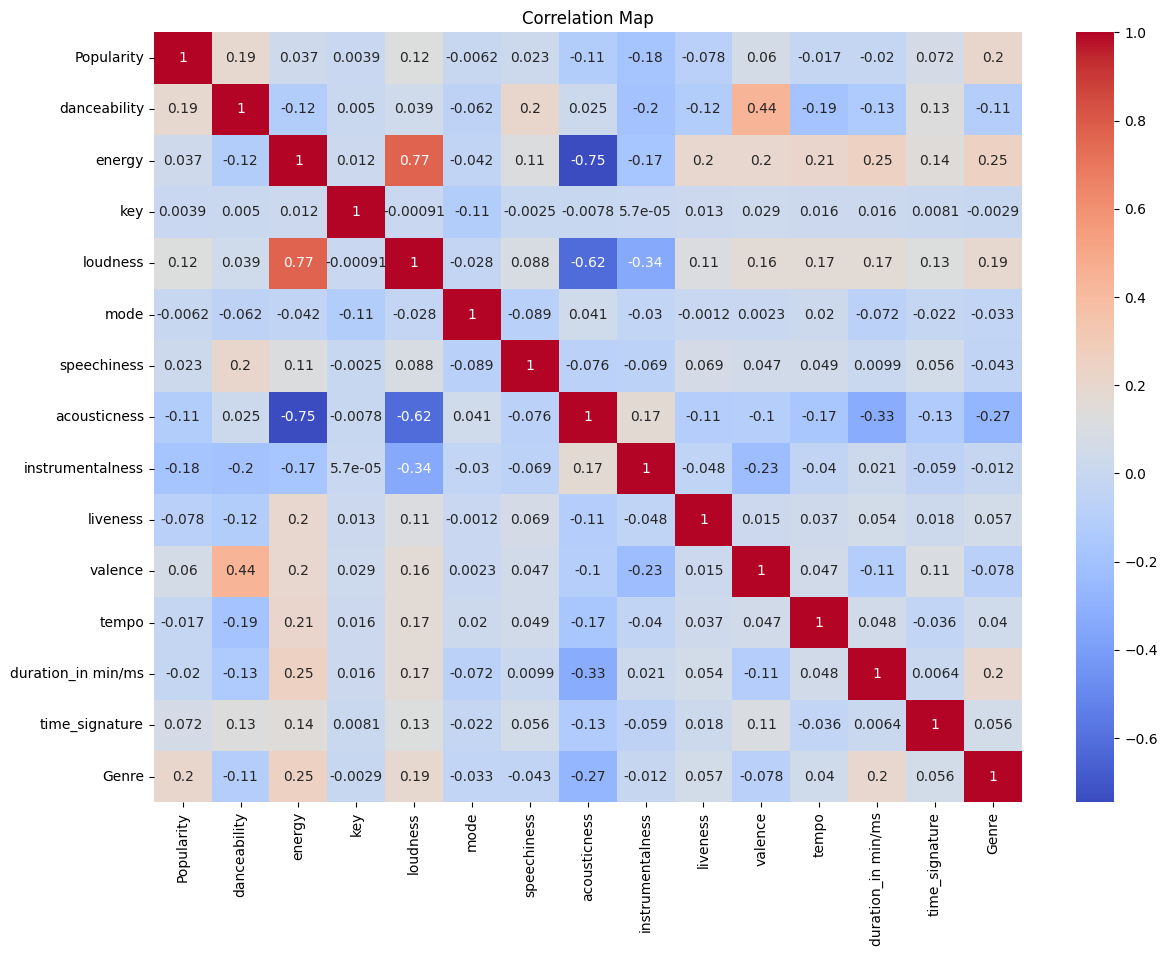

In [ ]:
# showing the correlation between different variables
import seaborn as sns
import matplotlib.pyplot as plt

corrmap = test_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corrmap, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


In [ ]:
###########################################################

# Data Cleaning and Preprocessing


Here i will perform some Data Cleainng and Preprocessing

In [ ]:
test_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
#Checking for missing values

test_df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             394
danceability             0
energy                   0
key                   1743
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3587
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Genre                    0
dtype: int64

as the previous cell shows is that i have 3 columns that inckude some missing values and i will have to impute them

In [ ]:
test_df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Genre'],
      dtype='object')

In [ ]:
from scipy.stats import zscore
import numpy as np
#handlong outliers
# Define the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Calculate z-scores for each numeric column
z_scores = test_df.select_dtypes(include=[np.number]).apply(zscore)

# Identify outliers based on the threshold
outliers = test_df[(np.abs(z_scores) > threshold).any(axis=1)]

# Remove the outliers
test_df = test_df.drop(outliers.index)

In [ ]:
test_df.shape

(14230, 17)

In [ ]:
#here i will impute the column "key" with mode
# Calculate the mode of the column "key"
mode_value = test_df["key"].mode()[0]

# Fill the missing values with the mode
test_df["key"].fillna(mode_value, inplace=True)




In [ ]:
# Here iam imputing the missing values in each column

Popularity_med= test_df['Popularity'].mean()
instrumentalness_med = test_df['instrumentalness'].mean()

test_df['Popularity'].fillna(Popularity_med, inplace=True)
test_df['instrumentalness'].fillna(instrumentalness_med, inplace=True)


In [ ]:
# no missing values after imputation
test_df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Genre                 0
dtype: int64

In [ ]:
test_df.shape

(14230, 17)

In [ ]:
#Checking for duplicates in my dataframe , no duplicates found
duplicates = test_df.duplicated()
test_df[duplicates]


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre


In [ ]:
# Convert 'duration_in min/ms' column from milliseconds to minutes
test_df['duration_in_min'] = test_df['duration_in min/ms'] / 60000

# Drop the original 'duration_in min/ms' column
test_df.drop('duration_in min/ms', axis=1, inplace=True)

# Display the result
test_df.head(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Genre,duration_in_min
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.164829,0.0849,0.8990,134.071,4,5,3.909933
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4,10,4.195550
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,4,6,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.164829,0.1220,0.5690,107.033,4,5,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,4,10,3.832667


In [ ]:
test_df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'Genre', 'duration_in_min'],
      dtype='object')

**Start Assignment Steps**

In [ ]:
sample2_df = test_df

In [ ]:
sample3_df = test_df

In [ ]:
new_df = df

# Step (b) Remove any songs that exceed 5 minutes

In [ ]:
#adding my cleaned dataframe to be a spark dataframe
sdf = spark.createDataFrame(new_df)

In [ ]:
new_sdf = spark.createDataFrame(sample2_df)

In [ ]:
new_sdf.show(5)

+--------------------+--------------------+----------+------------+------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+--------------+-----+------------------+
|         Artist Name|          Track Name|Popularity|danceability|energy| key|loudness|mode|speechiness|acousticness|   instrumentalness|liveness|valence|  tempo|time_signature|Genre|   duration_in_min|
+--------------------+--------------------+----------+------------+------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+--------------+-----+------------------+
|          Bruno Mars|That's What I Lik...|      60.0|       0.854| 0.564| 1.0|  -4.964|   1|     0.0485|      0.0171|0.16482863369707432|  0.0849|  0.899|134.071|             4|    5|3.9099333333333335|
|              Boston|        Hitch a Ride|      54.0|       0.382| 0.814| 3.0|   -7.23|   1|     0.0406|      0.0011|            0.00401|   0.101|  0.569|116.454|             4|   10|

In [ ]:
# 5 minutes = 300000 ms , so here iam removing rows which have a value in the column "duration_in min" of more than 5 min

# NOTE : the column "duration_in min" has values starting with values that are greater than 5 ,  but if you look closely you
#        will see that at the end of these specific values there is (E-5) or something else , which indicates that these values are less than 5
new_sdf_2 = new_sdf.filter(col('duration_in_min') <= 5)
new_sdf_2.show()

+--------------------+--------------------+-----------------+------------+------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+--------------+-----+--------------------+
|         Artist Name|          Track Name|       Popularity|danceability|energy| key|loudness|mode|speechiness|acousticness|   instrumentalness|liveness|valence|  tempo|time_signature|Genre|     duration_in_min|
+--------------------+--------------------+-----------------+------------+------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+--------------+-----+--------------------+
|          Bruno Mars|That's What I Lik...|             60.0|       0.854| 0.564| 1.0|  -4.964|   1|     0.0485|      0.0171|0.16482863369707432|  0.0849|  0.899|134.071|             4|    5|  3.9099333333333335|
|              Boston|        Hitch a Ride|             54.0|       0.382| 0.814| 3.0|   -7.23|   1|     0.0406|      0.0011|            0.00401|   

# Step (C) Display songs by J. Cole, Novo Amor and Anson Seabra

In [ ]:
# i filter the DataFrame based on the "Artist Name" column values that are present in the artist_names list
artist_names = ['J. Cole', 'Novo Amor', 'Anson Seabra']
new_sdf_3 = new_sdf.filter(col("Artist Name").isin(artist_names))

new_sdf_3.show()

+------------+--------------------+----------+------------+------+---+--------+----+-----------+------------+-------------------+--------+-------+-------+--------------+-----+------------------+
| Artist Name|          Track Name|Popularity|danceability|energy|key|loudness|mode|speechiness|acousticness|   instrumentalness|liveness|valence|  tempo|time_signature|Genre|   duration_in_min|
+------------+--------------------+----------+------------+------+---+--------+----+-----------+------------+-------------------+--------+-------+-------+--------------+-----+------------------+
|     J. Cole|   i n t e r l u d e|      81.0|        0.77| 0.574|1.0|  -5.525|   1|      0.106|      0.0617|0.16482863369707432|   0.104|  0.104| 98.962|             3|    5| 2.217033333333333|
|     J. Cole|m y . l i f e (wi...|      86.0|       0.597| 0.587|7.0|  -7.026|   0|      0.137|      0.0622|0.16482863369707432|   0.214| 0.0753|140.021|             4|    9|            3.6467|
|   Novo Amor|           

# Step (D)  How many songs are included in every category?

In [ ]:
from pyspark.sql.functions import count
#i solves this question using 2 methods becuse if what i understood from the question in not clear

#Method 1 , here i used the groupBy function to group the data by the "Genre" / Category. The agg function is used to apply the aggregation function count("*")
new_sdf_4 = new_sdf.groupBy("Genre").agg(count("*").alias("SongCount"))

new_sdf_4.show()

+-----+---------+
|Genre|SongCount|
+-----+---------+
|    0|      567|
|    7|      286|
|    6|     2131|
|    9|     1714|
|    5|      890|
|    1|     1198|
|   10|     4046|
|    3|      344|
|    8|     1610|
|    2|     1077|
|    4|      367|
+-----+---------+



In [ ]:

new_sdf_5 = new_sdf.select("Track Name","Genre").sort("Genre", ascending=False).show(20)

+--------------------+-----+
|          Track Name|Genre|
+--------------------+-----+
|               Lotus|   10|
|               Shine|   10|
|        Feel so Fine|   10|
|          Feeling Ok|   10|
|             Athlete|   10|
|Caught in a Flood...|   10|
|Nobody Weird Like...|   10|
|         Down to You|   10|
|Stay Away (feat. ...|   10|
|           Club Zero|   10|
| For What It's Worth|   10|
|           Cold Arms|   10|
| Sometimes Salvation|   10|
|             Realize|   10|
|       Driving South|   10|
|   Smoke And Mirrors|   10|
|      Burn the Witch|   10|
|                O.E.|   10|
|            Lazy Eye|   10|
|           Hurricane|   10|
+--------------------+-----+
only showing top 20 rows



# Step (E) Which artists dominated the charts?


In [ ]:
# i belive that question (E) and (F) are the same , you can read my explanation in the next cell
new_sdf11 = new_sdf.select("Artist Name","Popularity").sort("Popularity", ascending=False).show(5)

+--------------+----------+
|   Artist Name|Popularity|
+--------------+----------+
|     Lil Nas X|     100.0|
|      Måneskin|     100.0|
|Olivia Rodrigo|      99.0|
|      Doja Cat|      98.0|
|    Ed Sheeran|      97.0|
+--------------+----------+
only showing top 5 rows



# Step (f) What songs would be considered for the “Billboard Top 10 Songs of the Year”?


In [ ]:
# from my interpretation of the question ,  to consider a song to be form the top 10 billboard songs of the year
# i would sort the song based on popularity , as popular songs are the most frequenlty played and liked
# so here i just sorted by popularity
new_sdf_7 = new_sdf.select("Artist Name","Track Name","Popularity").sort("Popularity", ascending=False).show(10)

+--------------------+--------------------+----------+
|         Artist Name|          Track Name|Popularity|
+--------------------+--------------------+----------+
|           Lil Nas X|MONTERO (Call Me ...|     100.0|
|            Måneskin|             Beggin'|     100.0|
|      Olivia Rodrigo|            good 4 u|      99.0|
|            Doja Cat|Kiss Me More (fea...|      98.0|
|The Kid LAROI, Ju...|STAY (with Justin...|      97.0|
|         Masked Wolf|Astronaut In The ...|      97.0|
|          Ed Sheeran|          Bad Habits|      97.0|
|The Kid LAROI, Ju...|STAY (with Justin...|      97.0|
|                 BTS|              Butter|      96.0|
|              Polo G|             RAPSTAR|      96.0|
+--------------------+--------------------+----------+
only showing top 10 rows



# Step (g) Recommend at least 5 songs that can be played at a party


In [ ]:
#Well party songs should be loud , includes alot of dancing , has Valence , has alot of Energy , high Tempo
# here i filterd the data and i put relativley high values for the attributes i just stated , to signify it is a party song

new_sdf_10 = new_sdf.select("Artist Name", "Track Name").filter((new_sdf.danceability >= 0.7) & (new_sdf.energy >= 0.7) & (new_sdf.valence >= 0.7) & (new_sdf.tempo >= 160)).limit(5)

# Show the result DataFrame
new_sdf_10.show()


+----------------+-----------------+
|     Artist Name|       Track Name|
+----------------+-----------------+
|           Jeezy|    And Then What|
|          M-Beat|       Incredible|
|Patrick Paige II|        Freestyle|
|  Rauw Alejandro|El Efecto - Remix|
|         MC Lyte|         Ruffneck|
+----------------+-----------------+

